In [419]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report

In [420]:
df = pd.read_csv('valorant_match_clsfc.csv')
df.head()
# Encode kategori
categorical_cols = ['rank', 'agent', 'map', 'outcome', 'date']
encoders = {col: LabelEncoder().fit(df[col]) for col in categorical_cols}
for col in categorical_cols:
    df[col] = encoders[col].transform(df[col])

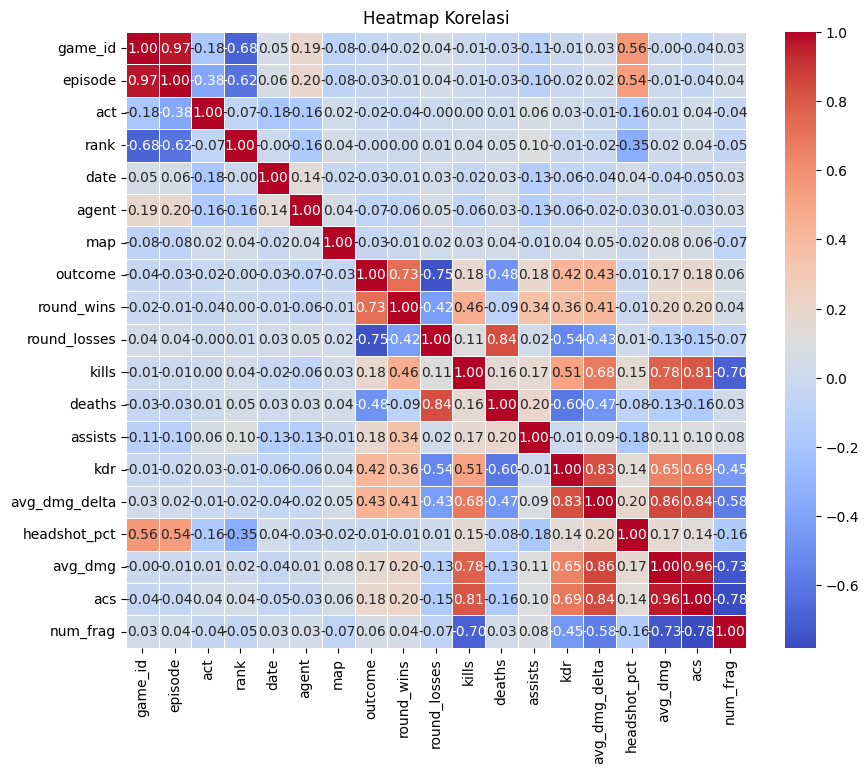

In [421]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

In [422]:
features = df.drop(['game_id', 'episode', 'act', 'rank', 'date', 'outcome', 'headshot_pct', 'kills', 'assists'], axis=1)
features

,agent,map,round_wins,round_losses,deaths,kdr,avg_dmg_delta,avg_dmg,acs,num_frag
0,3,1,5,13,15,0.5,-61,76,125,3
1,3,6,4,13,15,0.2,-124,42,59,5
2,5,7,13,4,12,0.6,-46,87,132,5
3,2,1,9,13,12,1.5,23,137,230,2
4,3,5,1,13,14,0.4,-75,90,146,4
...,...,...,...,...,...,...,...,...,...,...
995,0,8,13,9,13,1.3,30,133,212,4
996,7,1,11,13,14,1.9,41,176,299,1
997,0,8,6,13,16,0.8,0,143,194,2
998,7,9,13,10,13,1.4,26,134,214,5


In [423]:
encoder = LabelEncoder()
target = encoder.fit_transform(df['outcome'])

In [424]:
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [425]:
X_train, X_test, y_train, y_test = train_test_split(
    features, 
    target, 
    test_size=0.3, 
    random_state=42, 
    stratify=target  # Menjaga distribusi target
)

In [426]:
# Distribusi kelas
print("Distribusi kelas pada data latih:")
unique_train, counts_train = np.unique(y_train, return_counts=True)
print(dict(zip(unique_train, counts_train)))

print("\nDistribusi kelas pada data uji:")
unique_test, counts_test = np.unique(y_test, return_counts=True)
print(dict(zip(unique_test, counts_test)))


Distribusi kelas pada data latih:
{0: 350, 1: 350}

Distribusi kelas pada data uji:
{0: 150, 1: 150}


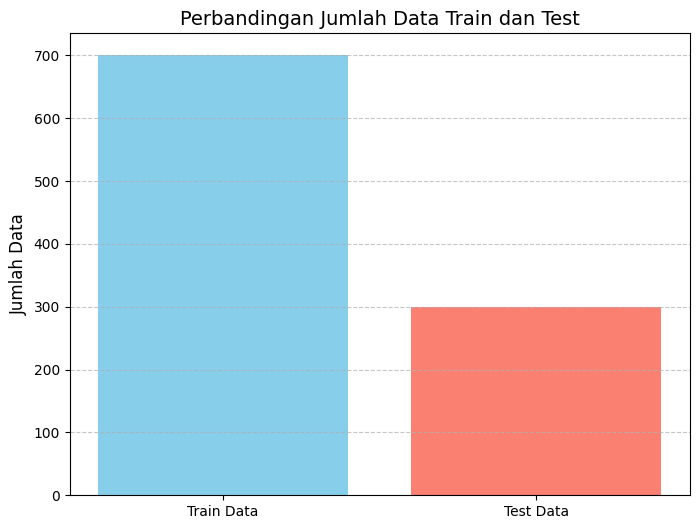

In [427]:

# Data untuk visualisasi
data_split = ['Train Data', 'Test Data']
data_counts = [len(X_train), len(X_test)]

# Membuat bar chart
plt.figure(figsize=(8, 6))
plt.bar(data_split, data_counts, color=['skyblue', 'salmon'])
plt.title('Perbandingan Jumlah Data Train dan Test', fontsize=14)
plt.ylabel('Jumlah Data', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan chart
plt.show()


In [428]:
class SingleLayerPerceptron:
    def __init__(self, learning_rate=0.5, n_epochs=10, random_state=None):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.random_state = random_state
        self.train_accuracies = []

    def step_function(self, z):
        return 1 if z >= 0 else 0

    def fit(self, X, y):
        # Set seed for reproducibility
        if self.random_state is not None:
            np.random.seed(self.random_state)
        
        
        self.weights = np.random.randn(X.shape[1])
        self.bias = 1

        for epoch in range(self.n_epochs):
            for x, y_true in zip(X, y):
                z = np.dot(x, self.weights) + self.bias
                y_pred = self.step_function(z)
                error = y_true - y_pred

                # Update weights and bias
                self.weights += self.learning_rate * error * x
                self.bias += self.learning_rate * error
            self.train_accuracies.append(np.mean(self.predict(X) == y))

    def predict(self, X):
        predictions = []
        for x in X:
            z = np.dot(x, self.weights) + self.bias
            y_pred = self.step_function(z)
            predictions.append(y_pred)
        return np.array(predictions)



In [429]:
perceptron = SingleLayerPerceptron(learning_rate=0.5, n_epochs=10,random_state=2)
perceptron.fit(X_train, y_train)

In [430]:
predictions = perceptron.predict(X_test)
accuracy = np.mean(predictions == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Weights:", perceptron.weights)

Accuracy: 99.67%
Weights: [ 0.88889876 -0.21612047  7.09470564 -8.21623665  0.4899767   1.13858577
  0.72196678 -1.41582833  0.12764338 -0.17771564]


In [431]:
# Konversi nilai numerik menjadi kategori 'win' dan 'loss'
results = pd.DataFrame({
    'Actual': encoder.inverse_transform(y_test),
    'Predicted': encoder.inverse_transform(predictions)
})

# Mapping 1 ke 'win' dan 0 ke 'loss'
mapping = {1: 'win', 0: 'lose'}
results['Actual'] = results['Actual'].map(mapping)
results['Predicted'] = results['Predicted'].map(mapping)

# Simpan hasil ke file CSV
results.to_csv('slp_step_func_results_y_test.csv', index=False)


In [432]:
predictions = perceptron.predict(X_train)
accuracy = np.mean(predictions == y_train)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Weights:", perceptron.weights)
print("Bias:", perceptron.bias)

Accuracy: 99.86%
Weights: [ 0.88889876 -0.21612047  7.09470564 -8.21623665  0.4899767   1.13858577
  0.72196678 -1.41582833  0.12764338 -0.17771564]
Bias: 1.0


In [433]:
# Konversi nilai numerik menjadi kategori 'win' dan 'loss'
results = pd.DataFrame({
    'Actual': encoder.inverse_transform(y_train),
    'Predicted': encoder.inverse_transform(predictions)
})

# Mapping 1 ke 'win' dan 0 ke 'loss'
mapping = {1: 'win', 0: 'lose'}
results['Actual'] = results['Actual'].map(mapping)
results['Predicted'] = results['Predicted'].map(mapping)

# Simpan hasil ke file CSV
results.to_csv('slp_step_func_results_y_train.csv', index=False)


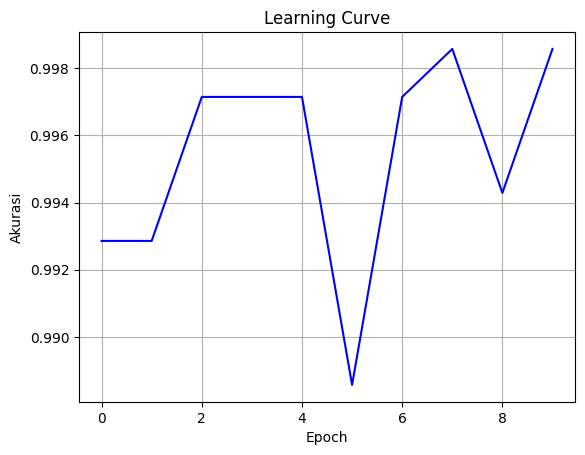

In [434]:
plt.plot(range(perceptron.n_epochs), perceptron.train_accuracies, label='Akurasi Data Latih', color='blue')
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.grid(True)
plt.show()